In [16]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
# Step 2: Upload the dataset (Option 1: Code upload)
#from google.colab import files
#uploaded = files.upload()


In [18]:
# Step 3: Load the Dataset
# If you uploaded the file using cell 1, use the filename directly
data = pd.read_csv("Advertising_2.csv")


In [19]:
# Drop the unnecessary column
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

In [20]:
# Step 4: Explore Dataset
print("First 5 rows:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nSummary Statistics:\n", data.describe())

First 5 rows:
       TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Summary Statistics:
                TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000 

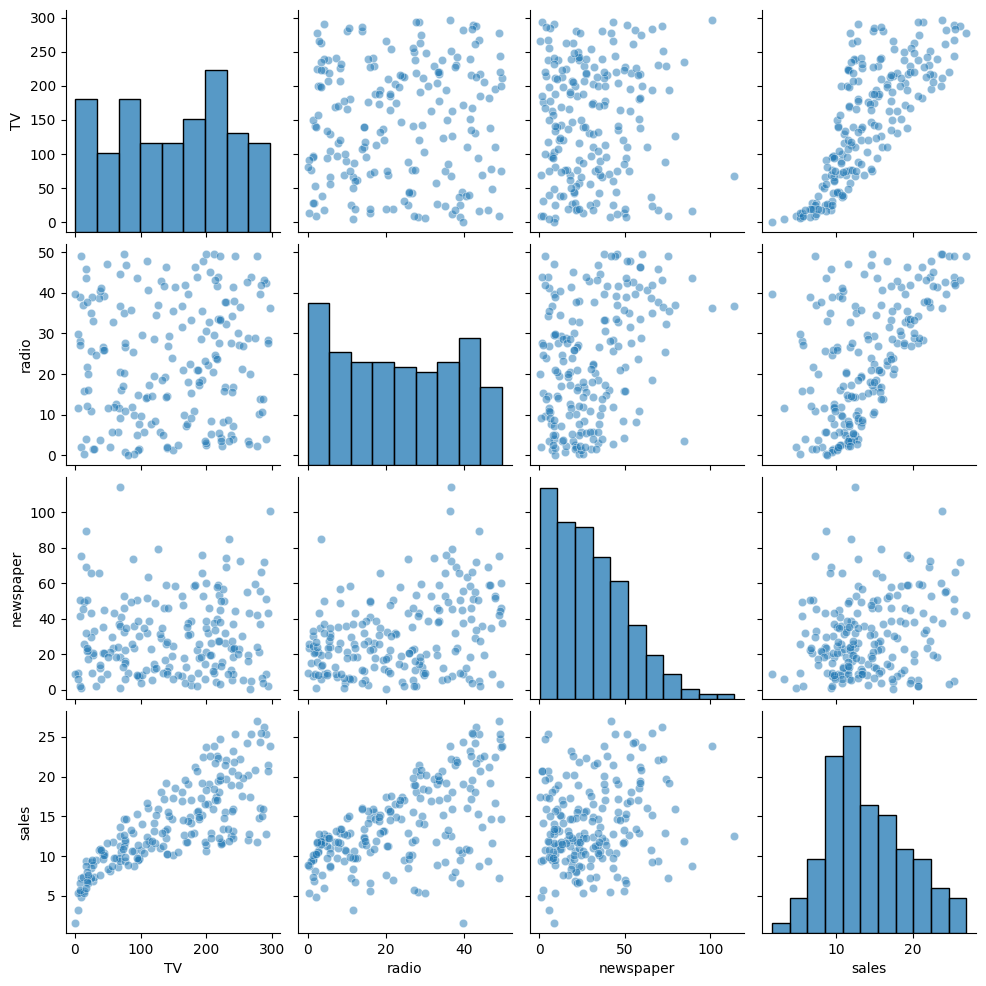

In [21]:
'''
This code creates a grid of scatterplots that show how every numeric variable in the dataset relates to every other one. 
The diagonal of the grid shows the distribution of each variable, while the scatterplots let us visually check correlations or patterns. 
The alpha=0.5 makes the points see-through so overlapping points don’t hide each other.
'''
sns.pairplot(data, kind="scatter", plot_kws={"alpha": 0.5})

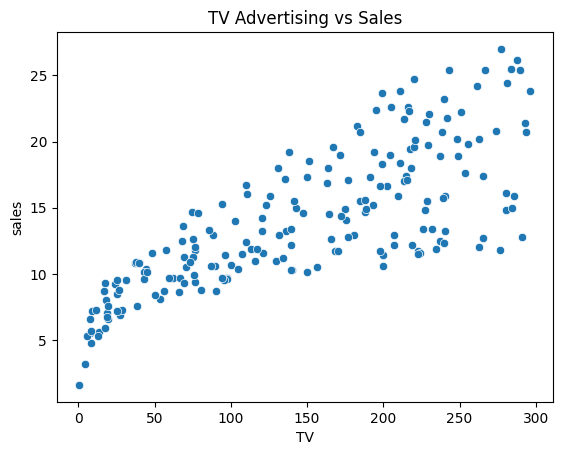

In [22]:
# Scatter plot (TV vs Sales)
sns.scatterplot(x=data['TV'], y=data['sales'])
plt.title("TV Advertising vs Sales")
plt.show()


In [25]:
# Step 5: Prepare Data
X = data[['TV']]       # Independent variable
y = data['sales']      # Dependent variable


In [26]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Step 6: Build Model
model = LinearRegression()
model.fit(X_train, y_train)

# Print slope and intercept
print("Slope (m):", model.coef_)
print("Intercept (c):", model.intercept_)


Slope (m): [0.04652973]
Intercept (c): 7.119638430592953


In [29]:
# Step 7: Predictions
y_pred = model.predict(X_test)

In [30]:
# Step 8: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [31]:
print("\nModel Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Model Evaluation:
Mean Absolute Error (MAE): 2.444420003751042
Mean Squared Error (MSE): 10.204654118800956
Root Mean Squared Error (RMSE): 3.194472431998898
R² Score: 0.6766954295627076


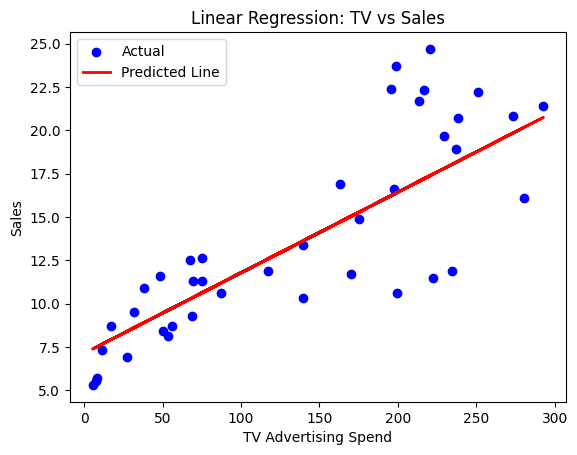

In [32]:
# Step 9: Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Linear Regression: TV vs Sales")
plt.legend()
plt.show()

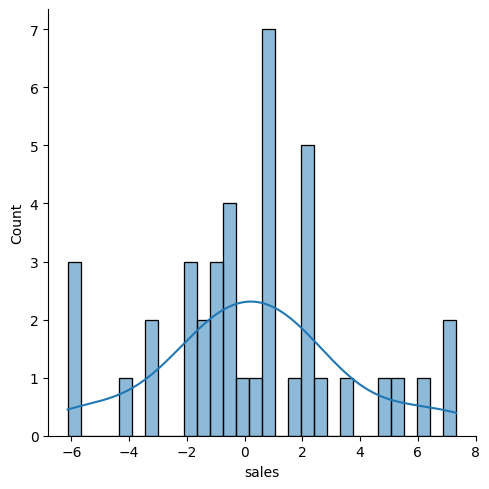

In [ ]:
#Analyze the residuals
#Should be centered around te zero and shaped like a bell curve  
#Means that the errors are normally distributed  meaning the model is unbiased and errors are random

residuals=y_test-y_pred
sns.displot(residuals,bins=30,kde=True)